# quick 1hr fun on mtcars.csv
our instructor was once asked at an interview to 'do something cool with mtcars' as the guy looked over his shoulders. heres my attempt

In [1]:
import pandas as pd

In [2]:
mt = pd.read_csv('mtcars.csv')

In [10]:
mt['make'] = mt['model'].str.split(' ').str[0]

In [20]:
mt['make_parts'] = mt['model'].str.split(' ')

In [27]:
mt['model'] = mt['make_parts'].str[1:].str.join(' ')

In [29]:
mt.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [32]:
mt['make'].unique()

array(['Mazda', 'Datsun', 'Hornet', 'Valiant', 'Duster', 'Merc',
       'Cadillac', 'Lincoln', 'Chrysler', 'Fiat', 'Honda', 'Toyota',
       'Dodge', 'AMC', 'Camaro', 'Pontiac', 'Porsche', 'Lotus', 'Ford',
       'Ferrari', 'Maserati', 'Volvo'], dtype=object)

In [33]:
country = {'Mazda':'Japan', 'Datsun':'Japan', 'Hornet':'USA', 'Valiant':'USA', 'Duster':'USA', 'Merc':'USA',
       'Cadillac':'USA', 'Lincoln':'USA', 'Chrysler':'USA', 'Fiat':'Euro', 'Honda':'Japan', 'Toyota':'Japan',
       'Dodge':'USA', 'AMC':'USA', 'Camaro':'USA', 'Pontiac':'USA', 'Porsche':'Euro', 'Lotus':'Euro', 'Ford':'USA',
       'Ferrari':'Euro', 'Maserati':'Euro', 'Volvo':'Euro'}

plymouth valiant
plymouth duster

# quick look at mpg and hp across countries
Seems like theres a story here

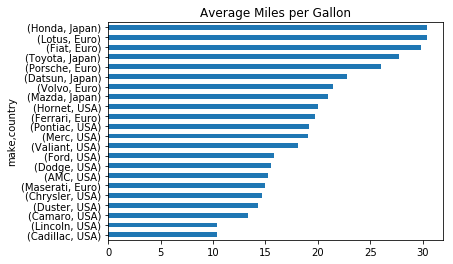

In [55]:
mt.groupby(['make','country'])['mpg'].mean().sort_values().plot.barh(title='Average Miles per Gallon')

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


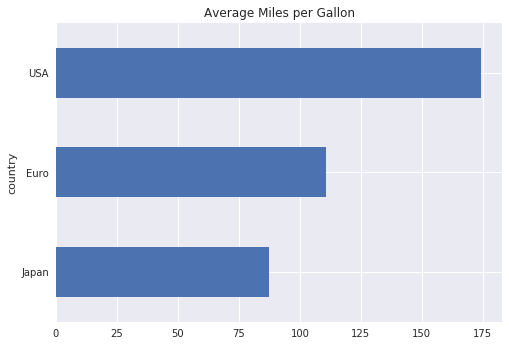

In [263]:
mt.groupby(['country'])['hp'].mean().sort_values().plot.barh(title='Average Miles per Gallon')

# quick pairplot to see if countries look distiguishable
certainly do, though the european and japanese cars tend to group together

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


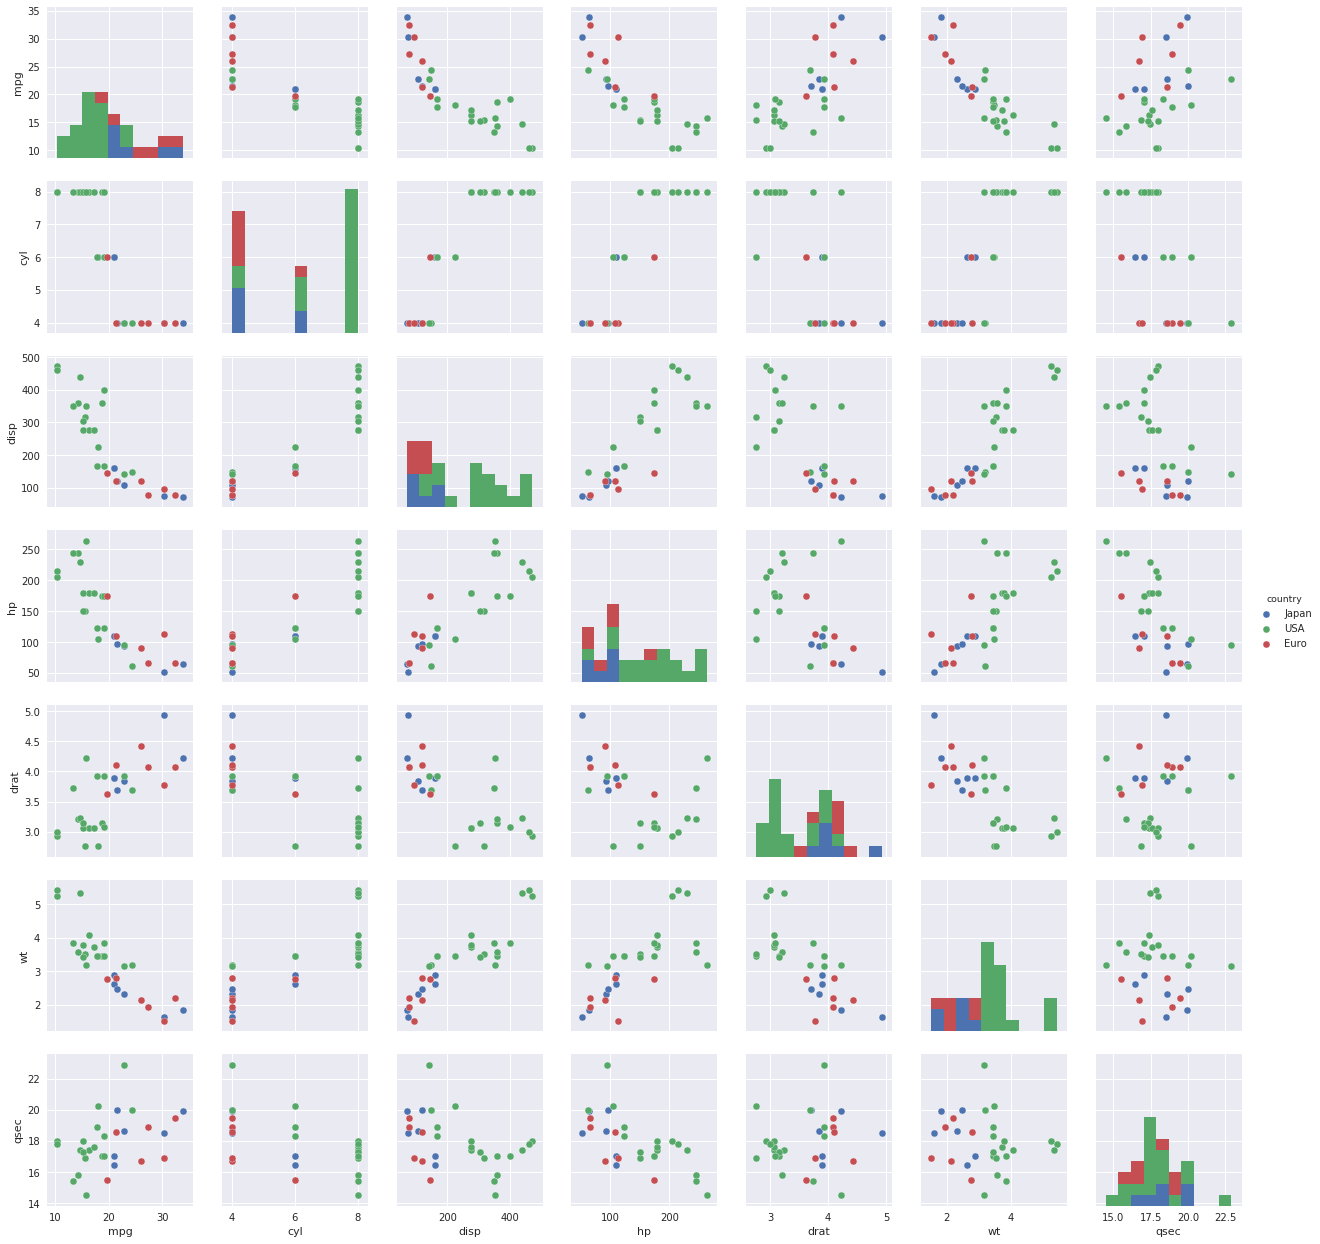

In [203]:
import seaborn as sns
sns.pairplot(mt[['mpg','cyl','disp','hp','drat','wt','qsec','country']],hue='country')

# clustering?
silly, and didn't find anything after taking a look at it

In [128]:
from sklearn.cluster import k_means

In [129]:
k5_X = k_means(X,n_clusters=5)
k4_X = k_means(X,n_clusters=4)
k3_X = k_means(X,n_clusters=3)

mt['kmeans5'] = k5_X[1]
mt['kmeans4'] = k4_X[1]
mt['kmeans3'] = k3_X[1]

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


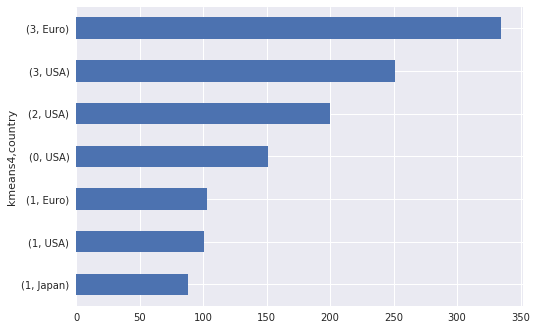

In [153]:
mt.groupby(['kmeans4','country'])['hp'].mean().sort_values().plot.barh()

# the question: wheres the random car from?
can we determine the country of origin of a randomly pulled car correctly?

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [131]:
mt.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,make,make_parts,country,kmeans5,kmeans4,kmeans3
0,RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda,"[Mazda, RX4]",Japan,0,1,1
1,RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda,"[Mazda, RX4, Wag]",Japan,0,1,1
2,710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun,"[Datsun, 710]",Japan,2,1,1
3,4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet,"[Hornet, 4, Drive]",USA,3,0,0
4,Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet,"[Hornet, Sportabout]",USA,3,2,2


In [193]:
mt['country'].value_counts()

USA      19
Japan     6
Euro      6
Name: country, dtype: int64

In [260]:
i = np.random.randint(0,len(mt))
car_pulled = mt.iloc[i,:]
mt = mt.drop(i,axis=0)
print(car_pulled['make'],'-',car_pulled['model'],': ',car_pulled['country'])

X_test = car_pulled[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
y_test = car_pulled['country']

X = mt[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
y = mt['country'].map({'Japan':0,'USA':1,'Euro':2})

Pontiac - Firebird :  USA


In [261]:
#clf = LogisticRegression()
clf = RandomForestClassifier(n_estimators=100)
#clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [262]:
y_pred = clf.predict(X_test)
if y_pred == 0:
    print('Predicted Japan')
if y_pred == 1:
    print('Predicted USA')
if y_pred == 2:
    print('Predicted Euro')
if y_pred == 0 and y_test == 'Japan':
    print('And its from Japan!')
elif y_pred == 1 and y_test == 'USA':
    print('And its from the USA!')
elif y_pred == 2 and y_test == 'Euro':
    print('And its from Euro!')
else:
    print('But its from '+car_pulled['country'])

Predicted USA
And its from the USA!


/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
